<a href="https://colab.research.google.com/github/hager2164/tasks_follow/blob/main/Random_Forest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [6]:
dataset = pd.read_csv('/content/Social_Network_Ads.csv')

In [8]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =42)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
Classifier.fit(X_train, y_train)





RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [12]:
y_pred  =  Classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

/tmp/ipython-input-731607214.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


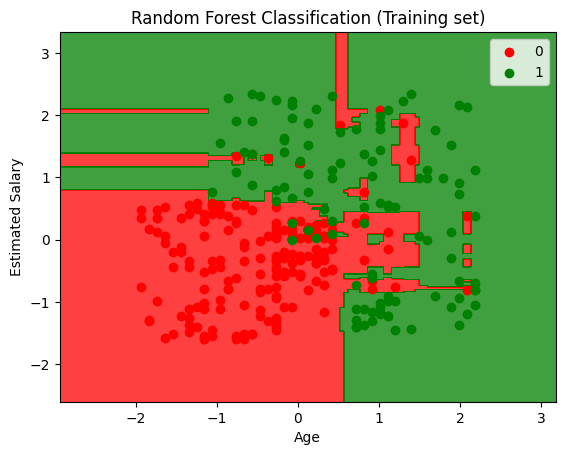

In [15]:
from matplotlib.colors import ListedColormap
X_set , y_set = X_train , y_train
X1 , X2 = np.meshgrid(np.arange(start = X_set [:,0].min() -1 , stop=X_set[:,0].max()+1 ,step=0.01),
np.arange(start = X_set [:,1].min() -1 , stop=X_set[:,1].max()+1 ,step=0.01)
                      )
plt.contourf(X1, X2, Classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()